In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt



In [2]:
def plot_xyz_timeseries(time, data, ylabel, title):
    # Plot the time series
    fig, ax = plt.subplots(2,2, figsize=(10, 5))
    ax[0,0].plot(time, data['x'])
    ax[0,1].plot(time, data['y'])
    ax[1,0].plot(time, data['z'])
    data.plot(ax = ax[1,1], kind = 'kde')
    ax[0,0].set_xlabel('time')
    ax[0,0].set_ylabel(ylabel)
    ax[0,0].legend(['X', 'Y', 'Z'])
    plt.show()

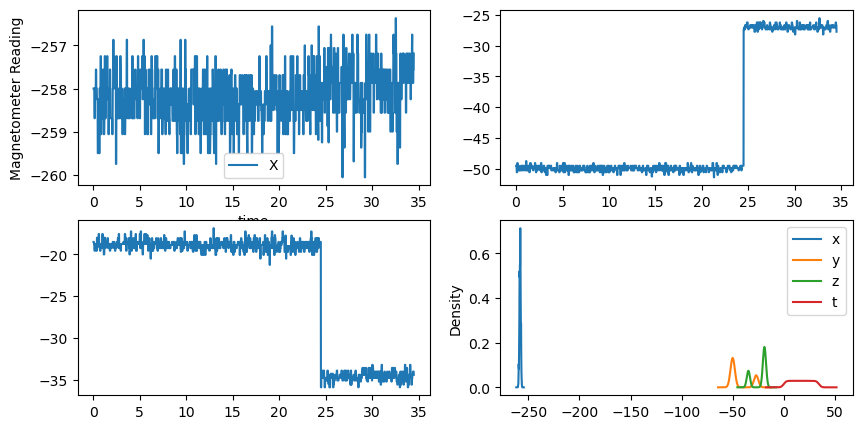

C:\Users\marlinn\AppData\Local\Temp\ipykernel_9224\2427116924.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.loc[:, data_train.columns != 't'] = data_train_xyz


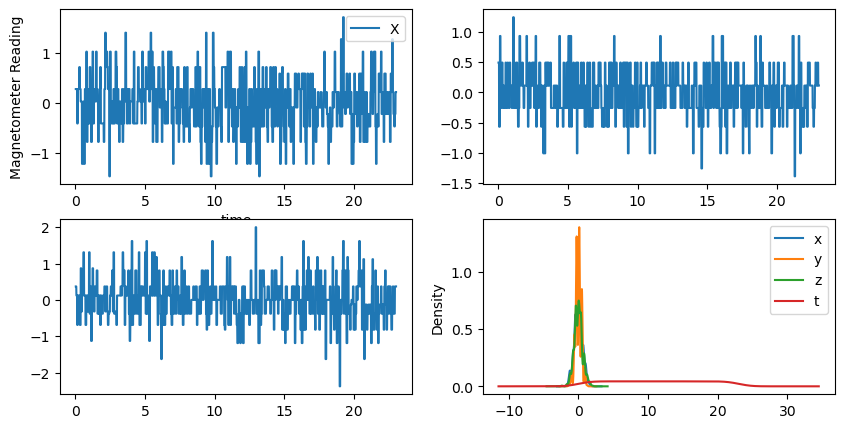

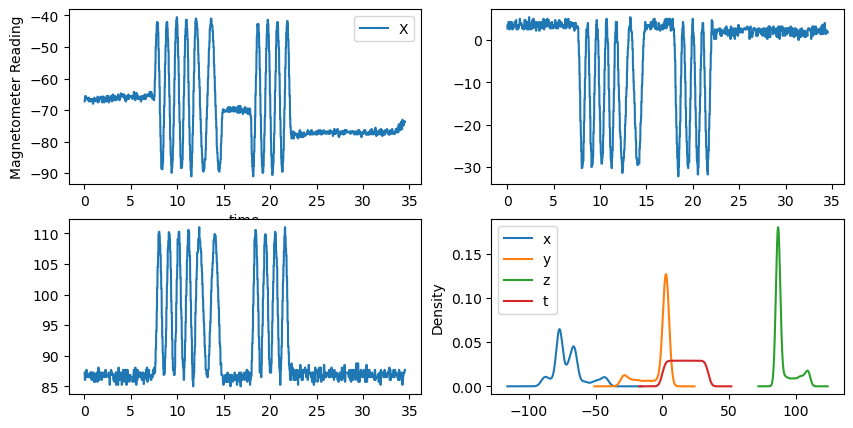

C:\Users\marlinn\AppData\Local\Temp\ipykernel_9224\2427116924.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[:, data_test.columns != 't'] = data_test_xyz
C:\Users\marlinn\AppData\Local\Temp\ipykernel_9224\2427116924.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['t'] = data_test['t'] + data_train['t'].values[-1:] #move timeseries :)


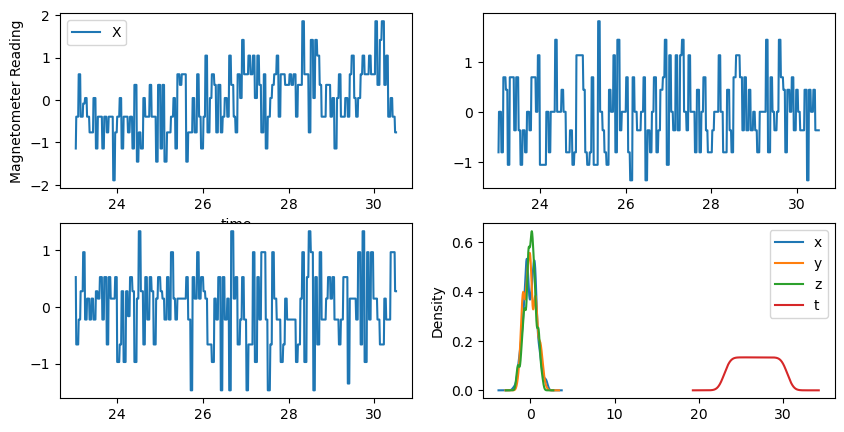

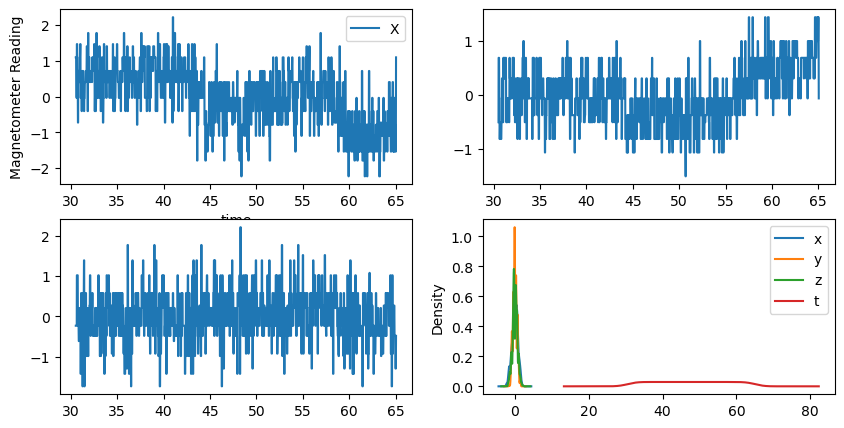

C:\Users\marlinn\AppData\Local\Temp\ipykernel_9224\2427116924.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data_test_xyz)
C:\Users\marlinn\AppData\Local\Temp\ipykernel_9224\2427116924.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data_val_xyz)
C:\Users\marlinn\AppData\Local\Temp\ipykernel_9224\2427116924.py:49: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_t = data_all_t.append(data_test['t'])
C:\Users\marlinn\AppData\Local\Temp\ipykernel_9224\2427116924.py:50: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_t = data_all_t.append(data_val['t'])


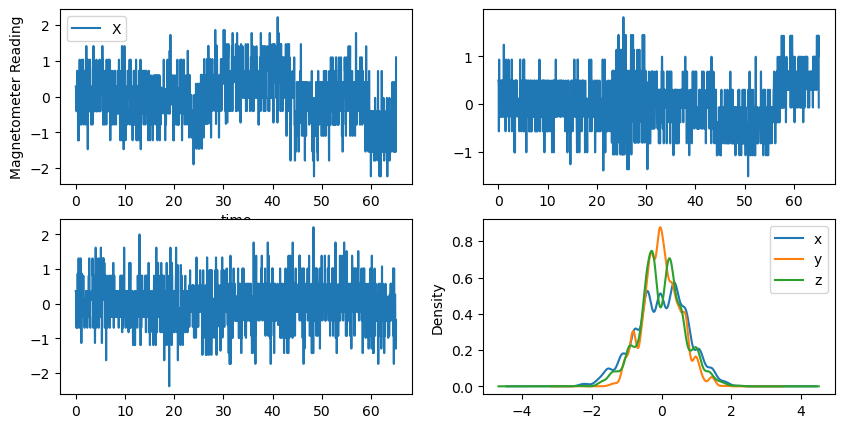

In [3]:
# Read in the CSV file containing magnetometer data
data = pd.read_csv('test.txt', header=None, names=['x', 'y', 'z', 't'])
#timestamps = pd.read_csv('newtest//oneSetTimestamps.csv')

plot_xyz_timeseries(data['t'], data, 'Magnetometer Reading', 'Available magentometer time series data test.txt')


#Devide timeseries into traning, test and validation set 
n_train = 2000
data_train = data.iloc[0:n_train]
data_train_xyz = data_train.loc[:, data_train.columns != 't']
data_train_xyz = data_train_xyz- data_train_xyz.mean()
data_train.loc[:, data_train.columns != 't'] = data_train_xyz


#plot train set
plot_xyz_timeseries(data_train['t'], data_train, 'Magnetometer Reading', 'Train set')


# Read in the CSV file containing magnetometer data
data = pd.read_csv('test2.txt', header=None, names=['x', 'y', 'z', 't'])
plot_xyz_timeseries(data['t'], data, 'Magnetometer Reading', 'Available magentometer time series data test2.txt')
n_test = 650
data_test = data.iloc[0:n_test]
data_test_xyz = data_test.loc[:, data_test.columns != 't']
data_test_xyz = data_test_xyz- data_test_xyz.mean()
data_test.loc[:, data_test.columns != 't'] = data_test_xyz
data_test['t'] = data_test['t'] + data_train['t'].values[-1:] #move timeseries :)

# Plot the test set
plot_xyz_timeseries(data_test['t'], data_test, 'Magnetometer Reading', 'Test set')


# Read in the CSV file containing magnetometer data
data_val = pd.read_csv('test4.txt', header=None, names=['x', 'y', 'z', 't'])
data_val_xyz = data_val.loc[:, data_val.columns != 't']
data_val_xyz = data_val_xyz- data_val_xyz.mean()
data_val.loc[:, data_val.columns != 't'] = data_val_xyz
data_val['t'] = data_val['t'] + data_test['t'].values[-1:] #move timeseries :)

# Plot the validation set
plot_xyz_timeseries(data_val['t'], data_val, 'Magnetometer Reading', 'Validation set')

#plot entire time series
data_all = data_train_xyz
data_all = data_all.append(data_test_xyz)
data_all = data_all.append(data_val_xyz)
data_all_t = data_train['t']
data_all_t = data_all_t.append(data_test['t'])
data_all_t = data_all_t.append(data_val['t'])
plot_xyz_timeseries(data_all_t, data_all, 'Magnetometer Reading', 'Entire appended data set' )



c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


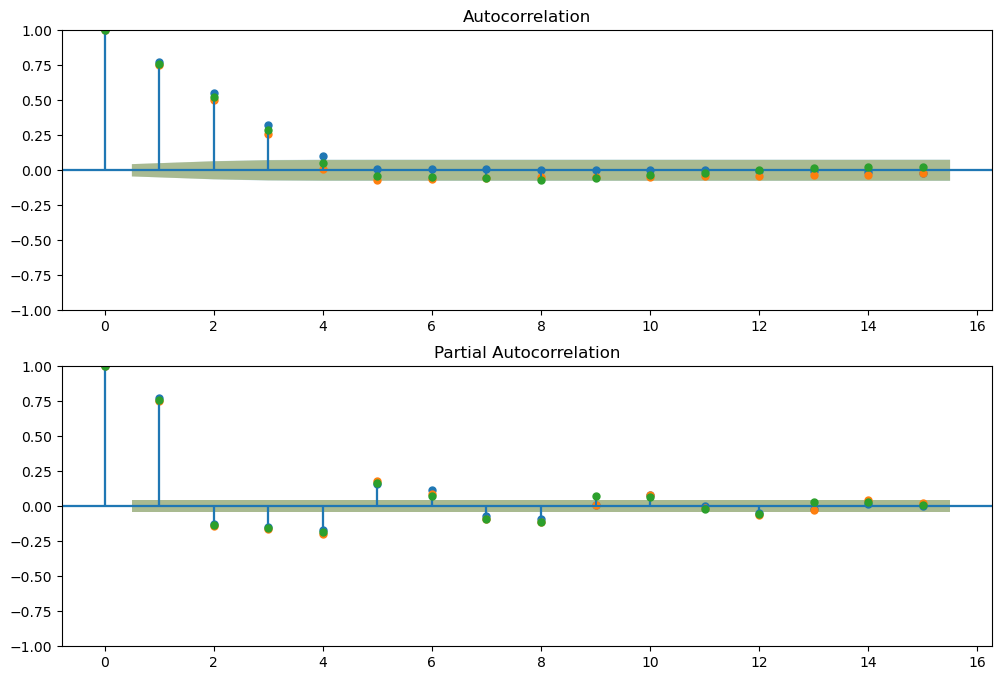

In [64]:
#plot autocorrelation
#train data on ARMA (zero meaning it!)

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_train['x'].values.squeeze(), lags=15, ax=ax1)
fig = sm.graphics.tsa.plot_acf(data_train['y'].values.squeeze(), lags=15, ax=ax1)
fig = sm.graphics.tsa.plot_acf(data_train['z'].values.squeeze(), lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_train['x'], lags=15, ax=ax2)
fig = sm.graphics.tsa.plot_pacf(data_train['y'], lags=15, ax=ax2)
fig = sm.graphics.tsa.plot_pacf(data_train['z'], lags=15, ax=ax2)
plt.show()

In [65]:
#AIC and BIC
order_aic_bic = []

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
        # Create and fit ARMA(p, q) model
        model = SARIMAX(data_train['x'], order=(p, 0, q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


   p  q          AIC          BIC
8  2  2  1610.921561  1638.926073
5  1  2  1694.029912  1716.433522
6  2  0  1710.411349  1727.214056
4  1  1  1718.462237  1735.264944
7  2  1  1727.250527  1749.654137
3  1  0  1740.714312  1751.916117
2  0  2  2035.637416  2052.440124
1  0  1  2349.747434  2360.949239
0  0  0  3575.139752  3580.740655
   p  q          AIC          BIC
8  2  2  1610.921561  1638.926073
5  1  2  1694.029912  1716.433522
6  2  0  1710.411349  1727.214056
4  1  1  1718.462237  1735.264944
7  2  1  1727.250527  1749.654137
3  1  0  1740.714312  1751.916117
2  0  2  2035.637416  2052.440124
1  0  1  2349.747434  2360.949239
0  0  0  3575.139752  3580.740655


ARMA(2,2) Model Results:
                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                 2000
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -800.461
Date:                Wed, 05 Apr 2023   AIC                           1612.922
Time:                        11:35:15   BIC                           1646.527
Sample:                             0   HQIC                          1625.261
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.026      0.006      0.995      -0.050       0.050
ar.L1          1.1384      0.084     13.627      0.000       0.975       1.302
ar.L2         -0.4614      

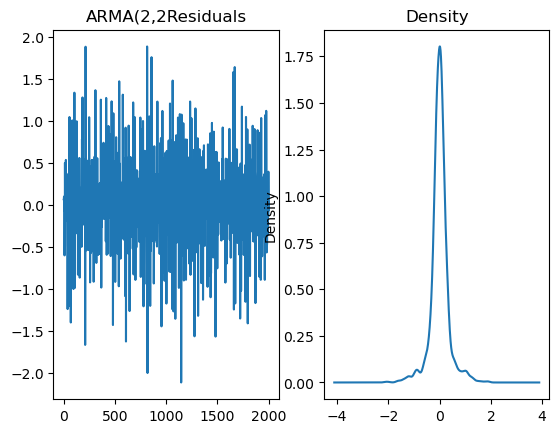

In [66]:
#Plot the best fitted ARMA model
p = 2
q = 2
arma_model = ARIMA(data_train['x'], order=(p,0,q))
arma10 = arma_model.fit()

# Print the model summary
print(f'ARMA({p},{q}) Model Results:\n{arma10.summary()}\n')

# Plot the model residuals
residuals11 = arma10.resid[1:]
fig, ax = plt.subplots(1,2)
residuals11.plot(title=f'ARMA({p},{q}Residuals', ax=ax[0])
residuals11.plot(title='Density', kind='kde', ax=ax[1])
plt.show()
            
        

ARMA(1,2) Model Results:
                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                 2000
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -843.015
Date:                Wed, 05 Apr 2023   AIC                           1696.030
Time:                        11:35:18   BIC                           1724.034
Sample:                             0   HQIC                          1706.312
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.033      0.018      0.986      -0.064       0.065
ar.L1          0.6769      0.032     20.832      0.000       0.613       0.741
ma.L1          0.1289      

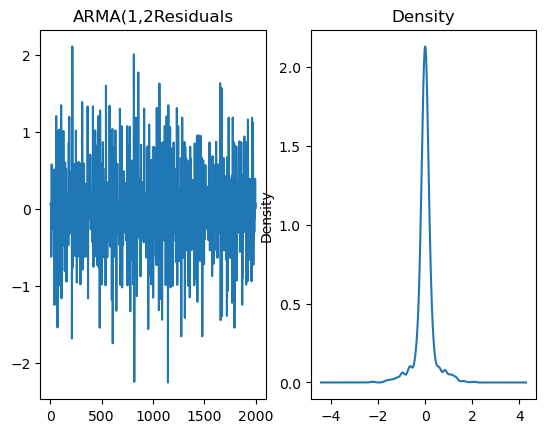

In [67]:
#Plot the best fitted ARMA model
p = 1
q = 2
arma_model = ARIMA(data_train['x'], order=(p,0,q))
arma11 = arma_model.fit()

# Print the model summary
print(f'ARMA({p},{q}) Model Results:\n{arma11.summary()}\n')


residuals11 = arma11.resid[1:]
fig, ax = plt.subplots(1,2)
residuals11.plot(title=f'ARMA({p},{q}Residuals', ax=ax[0])
residuals11.plot(title='Density', kind='kde', ax=ax[1])
plt.show()


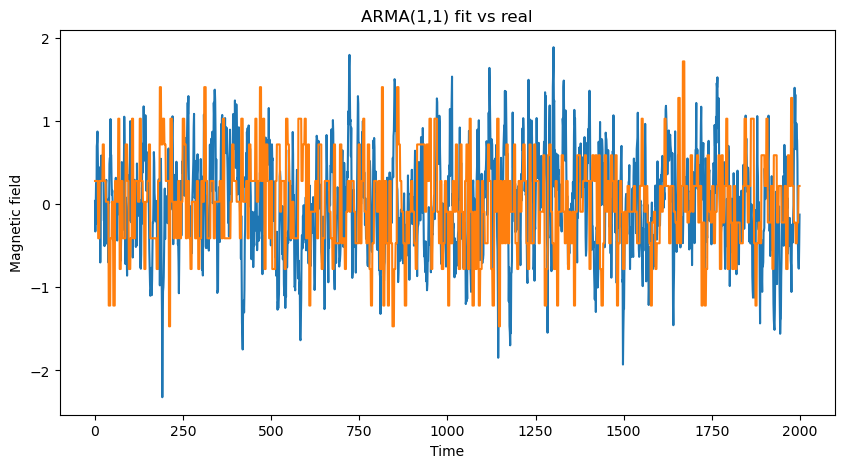

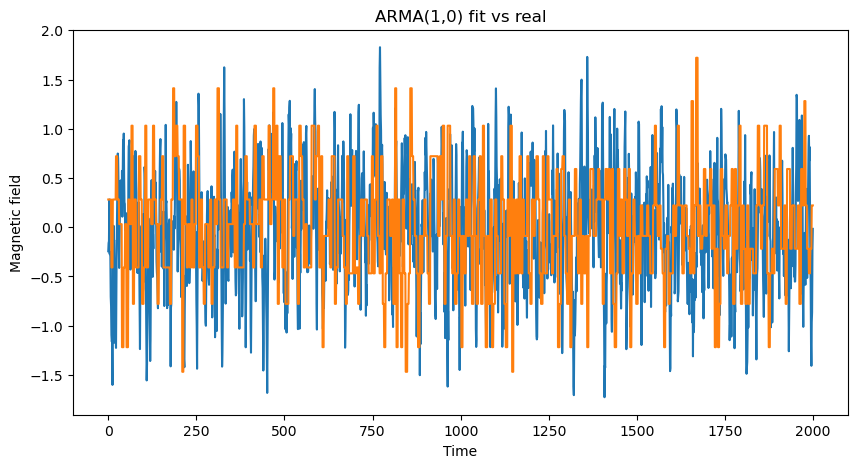

In [68]:
# Plot fitted model with real model
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(arma11.simulate(data_train['x'].size))
ax.plot(data_train['x'])
ax.set_xlabel('Time')
ax.set_ylabel('Magnetic field')
ax.set_title(f'ARMA(1,1) fit vs real')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(arma10.simulate(data_train['x'].size))
ax.plot(data_train['x'])
ax.set_xlabel('Time')
ax.set_ylabel('Magnetic field')
ax.set_title(f'ARMA(1,0) fit vs real')
plt.show()

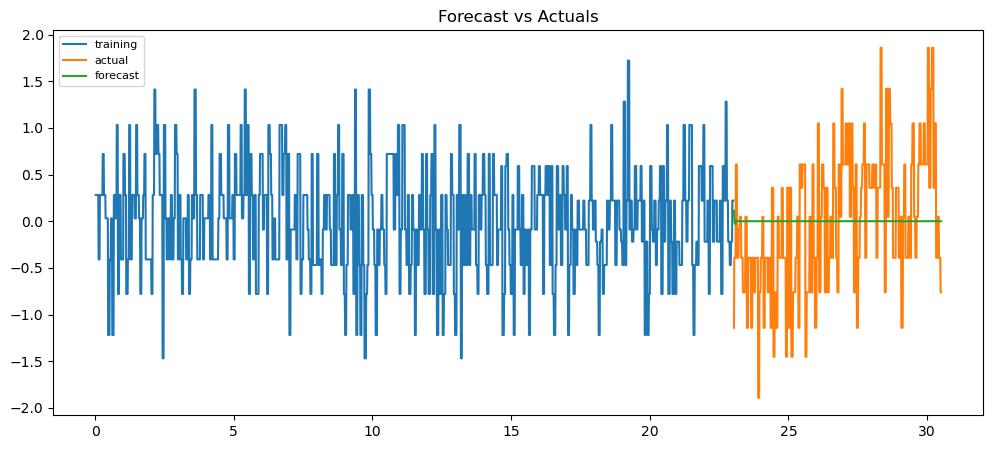

In [69]:
# test forecast on test set
forecast10 = arma10.forecast(len(data_test['x']), alpha=0.05)
predict10 = arma10.predict(len(data_test['x']), alpha=0.05)
# Make as pandas series
#fc_series = pd.Series(forecast10, index=data_test.index)
#lower_series = pd.Series(conf[:, 0], index=data_test.index)
#upper_series = pd.Series(conf[:, 1], index=data_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train['t'], data_train['x'], label='training')
plt.plot(data_test['t'], data_test['x'], label='actual')
#plt.plot(data_test['t'], predict10, label='prediction')
plt.plot(data_test['t'], forecast10, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#fig, ax = plt.subplots(figsize=(10, 5))
#ax.plot(forecast10)
#ax.plot(data_test['x'])
#ax.set_xlabel('Time')
#ax.set_ylabel('Magnetic field')
#ax.set_title(f'Forecast on ARMA(1,0) vs real')
#ax.legend(['forecast', 'test set'])
#plt.show()
